In [ ]:
import pandas as pd #Manipulacion data
import seaborn as sns # Graficas mejoradas
import datetime as dt #Fechas
import matplotlib.pyplot as plt #Graficas por defecto
import matplotlib.ticker as ticker # matplotly interactivo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/sample_data/ERC 2023_FINAL (1).csv',sep=";",encoding='latin-1')

In [ ]:
df2=df[['EDAD', 'Sexo', 'COD_ETNICA', 'G_POB', 'DX_HTA', 'DX_DM', 'ETIO_ERC', 'IMC', 'TASA FILTRACION', 'DX_ERC', 'NIVEL_ERC', 'TTO_ERC', 'TIPO_REG', 'TA', 'TAD','CREA ', 'CREA ', 'HEG ', 'ALBU ', 'ALB/CREA', 'COLES', 'HDL ', 'LDL ', 'PTH ']]
df2

EDAD Sexo COD_ETNICA         G_POB  DX_HTA  DX_DM      ETIO_ERC  IMC  \
0       74    M    Ninguna  Adulto Mayor       1      2         Otras   27   
1       88    M    Ninguna  Adulto Mayor       1      2         Otras   26   
2       89    M    Ninguna  Adulto Mayor       1      3         Otras   28   
3       87    M    Ninguna  Adulto Mayor       1      2         Otras   24   
4       84    M    Ninguna  Adulto Mayor       1      2         Otras   26   
...    ...  ...        ...           ...     ...    ...           ...  ...   
4963    71    M    Ninguna  Adulto Mayor       1      2  No tiene ERC   30   
4964    93    F    Ninguna  Adulto Mayor       1      2  No tiene ERC   30   
4965    68    M    Ninguna  Adulto Mayor       1      2  No tiene ERC   30   
4966    81    M    Ninguna  Adulto Mayor       1      2  No tiene ERC   30   
4967    64    M    Ninguna     Sin Grupo       1      2  No tiene ERC   30   

      TASA FILTRACION  DX_ERC  ...   TAD CREA  CREA   HEG   ALBU   ALB/CREA  \
0                82.0       1  ...  70.0  0.74  0.74   NaN    9.0       9.0   
1                43.0       1  ...  70.0   NaN   NaN   NaN    9.0       9.0   
2                34.0       1  ...  59.0  1.38  1.38   8.6    9.0       9.0   
3                47.0       1  ...  60.0  0.86  0.86   NaN    9.0       9.0   
4                45.0       1  ...  80.0  1.44  1.44   NaN    9.0       9.0   
...               ...     ...  ...   ...   ...   ...   ...    ...       ...   
4963              NaN       3  ...   NaN   NaN   NaN   NaN    9.0       9.0   
4964              NaN       3  ...   NaN   NaN   NaN   NaN    9.0       9.0   
4965              NaN       3  ...   NaN   NaN   NaN   NaN    9.0       9.0   
4966              NaN       3  ...   NaN   NaN   NaN   NaN    9.0       9.0   
4967              NaN       3  ...   NaN   NaN   NaN   NaN    9.0       9.0   

      COLES  HDL    LDL   PTH   
0     181.0  42.0  120.0   NaN  
1       NaN   NaN    NaN   NaN  
2     187.0  55.0  108.0   9.0  
3     153.0  67.0   72.0   9.0  
4     276.0  58.0  193.0   9.0  
...     ...   ...    ...   ...  
4963    NaN   NaN    NaN   NaN  
4964    NaN   NaN    NaN   NaN  
4965    NaN   NaN    NaN   NaN  
4966    NaN   NaN    NaN   NaN  
4967    NaN   NaN    NaN   NaN  

[4968 rows x 24 columns]

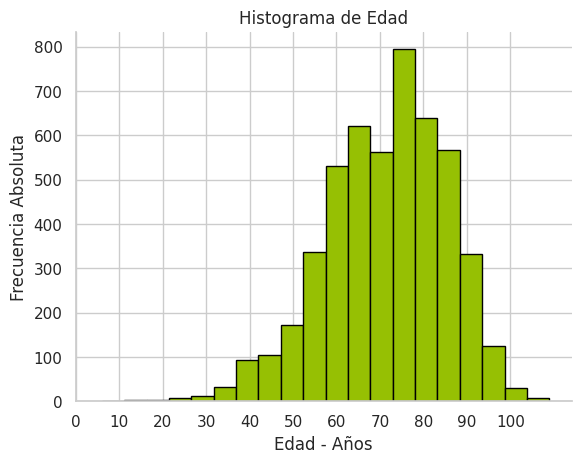

In [ ]:
from matplotlib import pyplot as plt
df2['EDAD'].plot(kind='hist', bins=20, title='EDAD', color="#96C003", edgecolor='black', density= False)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(range(0, 101, 10))

# Etiquetas de los ejes y título
plt.xlabel('Edad - Años')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Edad')


plt.show()

Text(0.5, 1.0, 'Gráfico de dispersion Edad Vs TFGe')

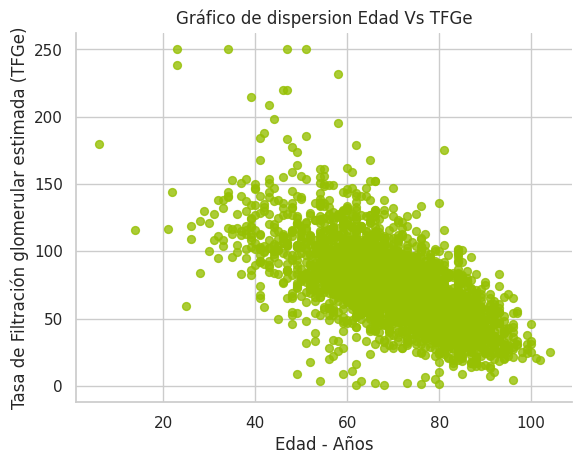

In [ ]:
from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='EDAD', y='TASA FILTRACION', s=32, alpha=.8, c="#96C003")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Edad - Años')
plt.ylabel('Tasa de Filtración glomerular estimada (TFGe)')
plt.title('Gráfico de dispersion Edad Vs TFGe')

([<matplotlib.axis.XTick at 0x7e3555b22830>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

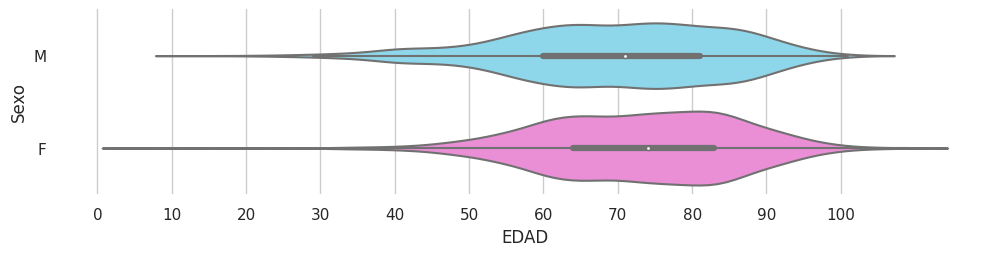

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['Sexo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='EDAD', y='Sexo', inner='box', palette={'F': '#F97FDE', 'M': '#7FDEF9'})
sns.despine(top=True, right=True, bottom=True, left=True)
plt.xticks(range(0,101,10))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# rango de edades

df3=df2[['EDAD', 'Sexo']]

intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


# Aplicar pd.cut para crear una nueva columna 'GrupoEdad'

etiquetas = [f"{i}-{i+9}" for i in range(0, 110, 10)]
df3['GrupoEdad1'] = pd.cut(df3['EDAD'], bins=intervalos, right=False, labels=etiquetas)
df3

<ipython-input-54-9fc611559573>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['GrupoEdad1'] = pd.cut(df3['EDAD'], bins=intervalos, right=False, labels=etiquetas)


EDAD Sexo GrupoEdad1
0       74    M      70-79
1       88    M      80-89
2       89    M      80-89
3       87    M      80-89
4       84    M      80-89
...    ...  ...        ...
4963    71    M      70-79
4964    93    F      90-99
4965    68    M      60-69
4966    81    M      80-89
4967    64    M      60-69

[4968 rows x 3 columns]

In [ ]:
tabla_frecuencia = df3['GrupoEdad1'].value_counts().sort_index()
print(tabla_frecuencia)

0-9           1
10-19         2
20-29        16
30-39        74
40-49       224
50-59       637
60-69      1179
70-79      1272
80-89      1161
90-99       374
100-109      28
Name: GrupoEdad1, dtype: int64


# Sección nueva

In [ ]:
import pandas as pd

def crear_columna_estadio(df):
    """
    Crea una columna llamada "estadio" con los valores de la variable "TASA FILTRACION" clasificados en cuatro categorías.

    Args:
      df: Un DataFrame de pandas.

    Returns:
      El DataFrame original con una nueva columna llamada "estadio".
    """


    df = df.dropna(subset=['TASA FILTRACION'])


    # Crear una función para asignar una categoría a cada valor de TASAFILTRACION
    def clasificar_estadio(TASAFILTRACION):
        if TASAFILTRACION >= 90:
            return "estadio 1"
        elif TASAFILTRACION >= 60:
            return "estadio 2"
        elif TASAFILTRACION >= 30:
            return "estadio 3"
        elif TASAFILTRACION >= 15:
            return "estadio 4"
        else:
            return "estadio 5"

    # Agregar la columna
    df["estadio"] = df["TASA FILTRACION"].apply(clasificar_estadio)

    return df
    df



In [ ]:
data1 = crear_columna_estadio(df)
data1

# Ahora, 'data' contendrá la columna adicional 'estadio' con los valores clasificados en cuatro categorías.

<ipython-input-57-333952764d9b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["estadio"] = df["TASA FILTRACION"].apply(clasificar_estadio)


TIPO_REG  DAT_BARN  EDAD Sexo AFILIACION COD_EPS  \
0                          HTA  30/08/49    74    M          P  RES003   
1                          HTA  21/09/35    88    M          P  RES003   
2                     HTA-DIAB  20/12/34    89    M          P  RES003   
3                          HTA  13/08/36    87    M          P  RES003   
4                          HTA  20/05/39    84    M          P  RES003   
...                        ...       ...   ...  ...        ...     ...   
4745                       HTA  30/11/68    55    M          P  RES003   
4746                       HTA  30/01/69    54    M          P  RES003   
4747  NO HTA/DIAB CON DAÑO REL  18/11/61    62    M          P  RES003   
4748  NO HTA/DIAB CON DAÑO REL  24/07/63    60    M          P  RES003   
4926                      DIAB  11/07/97    26    M          P  RES003   

     COD_ETNICA               G_POB  MUN.      DATE_  ...  COST_TRANS  \
0       Ninguna        Adulto Mayor  50001   2/05/88  ...         NaN   
1       Ninguna        Adulto Mayor  50001   1/07/79  ...         NaN   
2       Ninguna        Adulto Mayor  50001   1/05/90  ...         NaN   
3       Ninguna        Adulto Mayor  50001  16/06/61  ...         NaN   
4       Ninguna        Adulto Mayor  50001   1/03/60  ...         NaN   
...         ...                 ...    ...       ...  ...         ...   
4745    Ninguna  Trabajador Urbano   11001   1/04/12  ...         NaN   
4746    Ninguna                Otro  11001  31/08/11  ...         NaN   
4747    Ninguna                Otro  11001   1/11/18  ...         NaN   
4748    Ninguna                Otro  11001   1/07/24  ...         NaN   
4926    Ninguna                Otro  25572  21/12/16  ...         NaN   

     TIEMP_SERVI  COST_TOTAL COD EPS  NOV_REPORAMTE  CAU_MUERTE DAT_MUERTE  \
0             12    794113.0     NaN            NaN         NaN        NaN   
1             12         NaN     NaN            7.0         NaN        NaN   
2             10   2304515.0     NaN            NaN         NaN        NaN   
3             12   1336759.0     NaN            NaN         NaN        NaN   
4              8   1336759.0     NaN            NaN         NaN        NaN   
...          ...         ...     ...            ...         ...        ...   
4745          12    794113.0     NaN            NaN         NaN        NaN   
4746          12   1336759.0     NaN            NaN         NaN        NaN   
4747          12    250000.0     NaN            NaN         NaN        NaN   
4748          12    250000.0     NaN            NaN         NaN        NaN   
4926           6    714078.0     NaN            NaN         NaN        NaN   

          CUI DAT_CORTE    estadio  
0       57959  30/06/23  estadio 2  
1      507499  30/06/23  estadio 3  
2      175624  30/06/23  estadio 3  
3      399569  30/06/23  estadio 3  
4      403006  30/06/23  estadio 3  
...       ...       ...        ...  
4745  3634652  30/06/23  estadio 2  
4746   399824  30/06/23  estadio 3  
4747  2863534  30/06/23  estadio 3  
4748   317487  30/06/23  estadio 2  
4926  3454106  30/06/23  estadio 1  

[3189 rows x 115 columns]

In [ ]:
df4=data1[['EDAD', 'Sexo', 'COD_ETNICA', 'G_POB', 'DX_HTA', 'DX_DM', 'ETIO_ERC', 'IMC', 'TASA FILTRACION', 'DX_ERC', 'NIVEL_ERC', 'TTO_ERC', 'TIPO_REG', 'TA', 'TAD','CREA ', 'HEG ', 'ALBU ', 'ALB/CREA', 'COLES', 'HDL ', 'LDL ', 'PTH ', 'estadio']]
df4

EDAD Sexo COD_ETNICA               G_POB  DX_HTA  DX_DM      ETIO_ERC  \
0       74    M    Ninguna        Adulto Mayor       1      2         Otras   
1       88    M    Ninguna        Adulto Mayor       1      2         Otras   
2       89    M    Ninguna        Adulto Mayor       1      3         Otras   
3       87    M    Ninguna        Adulto Mayor       1      2         Otras   
4       84    M    Ninguna        Adulto Mayor       1      2         Otras   
...    ...  ...        ...                 ...     ...    ...           ...   
4745    55    M    Ninguna  Trabajador Urbano        1      2           NaN   
4746    54    M    Ninguna                Otro       1      2           NaN   
4747    62    M    Ninguna                Otro       2      2         Otras   
4748    60    M    Ninguna                Otro       2      2           NaN   
4926    26    M    Ninguna                Otro       2      1  No tiene ERC   

      IMC  TASA FILTRACION  DX_ERC  ...   TAD  CREA  HEG   ALBU   ALB/CREA  \
0      27            82.00       1  ...  70.0   0.74  NaN    9.0      9.00   
1      26            43.00       1  ...  70.0    NaN  NaN    9.0      9.00   
2      28            34.00       1  ...  59.0   1.38  8.6    9.0      9.00   
3      24            47.00       1  ...  60.0   0.86  NaN    9.0      9.00   
4      26            45.00       1  ...  80.0   1.44  NaN    9.0      9.00   
...   ...              ...     ...  ...   ...    ...  ...    ...       ...   
4745   32            74.85       1  ...  77.0   1.46  NaN   11.0      3.93   
4746   24            52.34       1  ...  75.0   1.78  NaN  523.0     57.93   
4747   28            52.97       1  ...  70.0   1.57  NaN    9.0    429.70   
4748   25            63.92       1  ...  70.0   1.32  NaN    9.6      1.30   
4926   22           109.00       2  ...  62.0   0.90  NaN    9.0      9.00   

      COLES  HDL     LDL   PTH     estadio  
0     181.0  42.0  120.00   NaN  estadio 2  
1       NaN   NaN     NaN   NaN  estadio 3  
2     187.0  55.0  108.00   9.0  estadio 3  
3     153.0  67.0   72.00   9.0  estadio 3  
4     276.0  58.0  193.00   9.0  estadio 3  
...     ...   ...     ...   ...        ...  
4745  179.0  44.0  107.50   NaN  estadio 2  
4746  108.0  31.0   45.08  64.0  estadio 3  
4747    NaN   NaN     NaN  71.2  estadio 3  
4748  219.0  52.5  129.10   NaN  estadio 2  
4926  166.0  61.0   93.00   NaN  estadio 1  

[3189 rows x 24 columns]

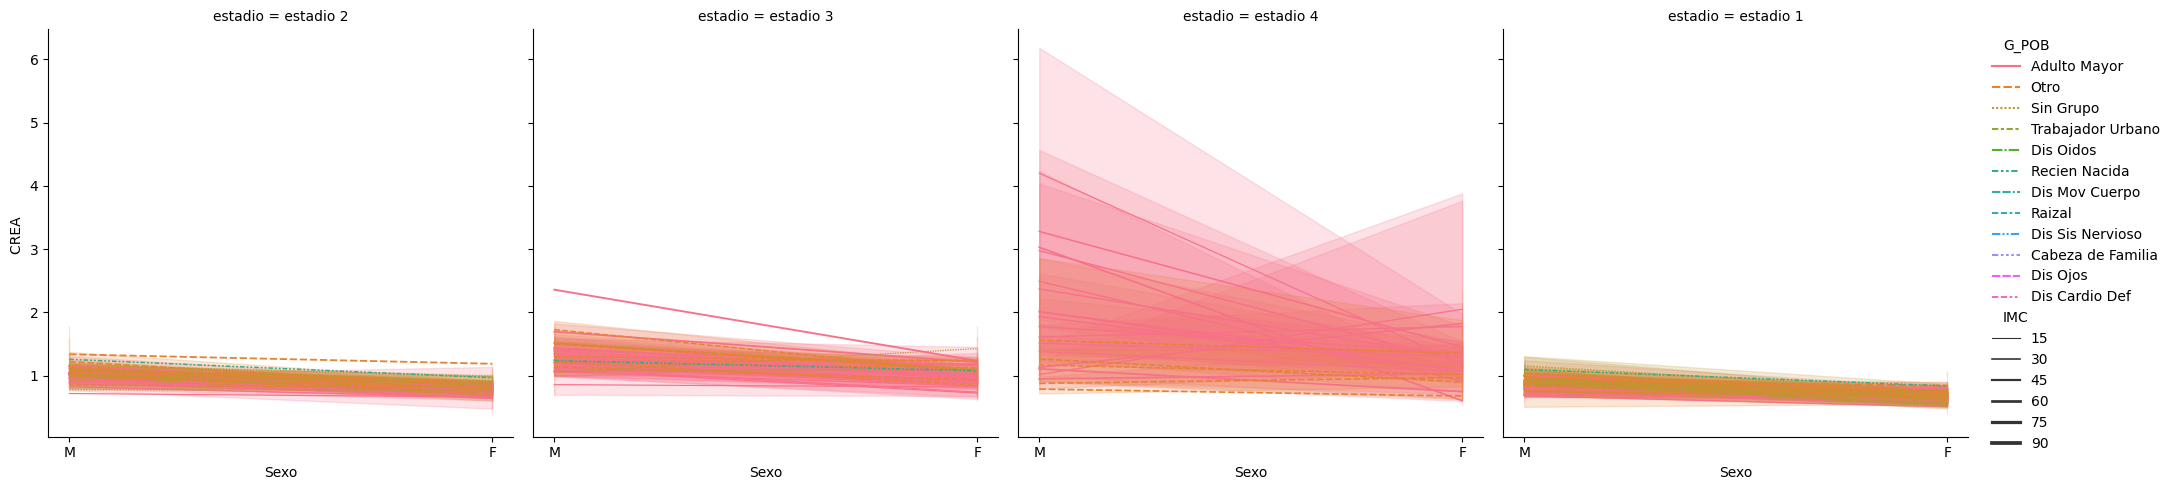

In [ ]:
sns.relplot(
    data=df4, kind="line",
    x="Sexo", y="CREA ", col="estadio",
    hue="G_POB", size="IMC", style="G_POB",
    facet_kws=dict(sharex=False),
)

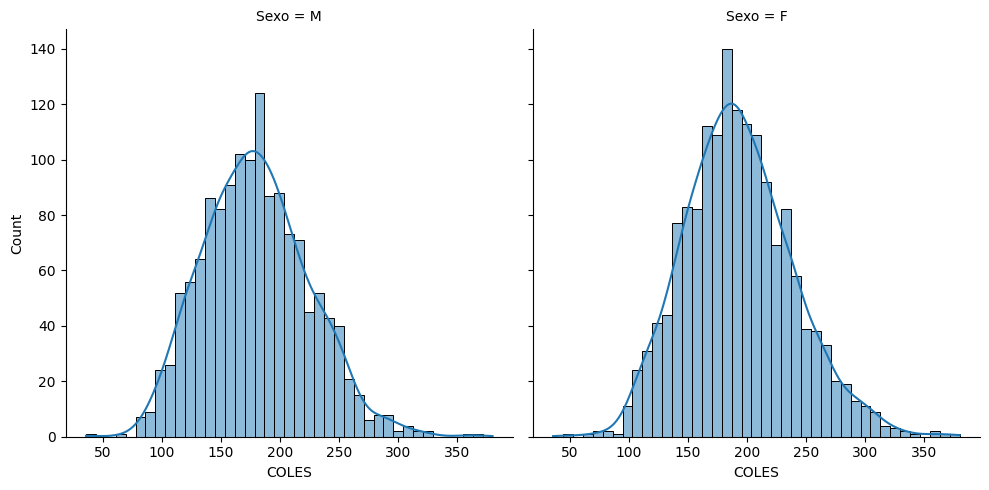

In [ ]:
sns.displot(data=df4, x="COLES", col="Sexo", kde=True)

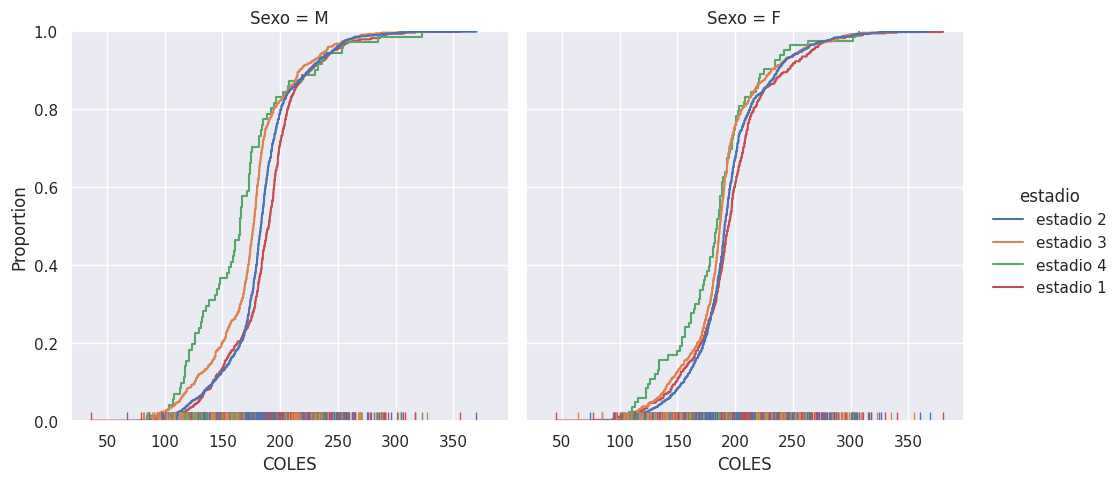

In [ ]:
sns.displot(data=df2, kind="ecdf", x="COLES", col="Sexo", hue="estadio", rug=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.2% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


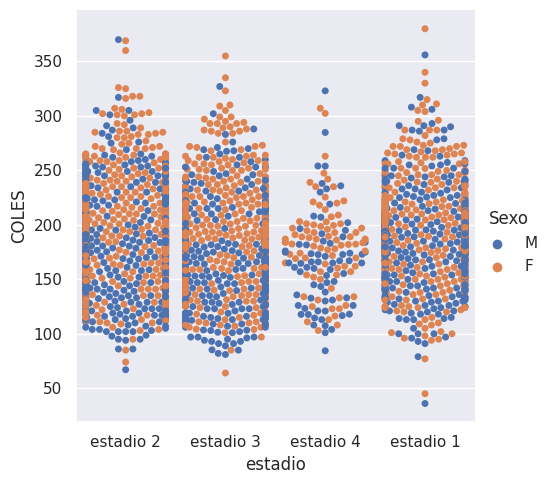

In [ ]:
sns.catplot(data=df2, kind="swarm", x="estadio", y="COLES", hue="Sexo")

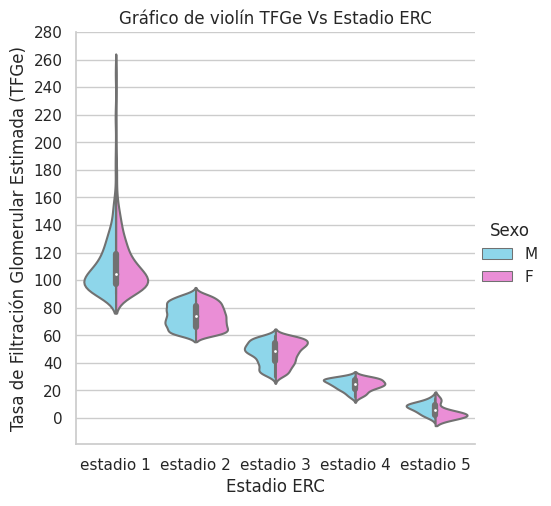

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Ordenarla de menor a mayor
orden_estadios = sorted(df4["estadio"].dropna().unique(), key=lambda x: int(x.split()[-1]))

sns.set(style="whitegrid")
colores = {"M":"#7FDEF9", "F":"#F97FDE"}
dispersion = sns.catplot(data=df4, kind="violin", x="estadio", y="TASA FILTRACION", hue="Sexo", split=True, palette=colores, order=orden_estadios)
dispersion._legend.set_title('Sexo')



plt.yticks(range(0, 300, 20))
plt.xlabel('Estadio ERC')
plt.ylabel('Tasa de Filtración Glomerular Estimada (TFGe)')
plt.title('Gráfico de violín TFGe Vs Estadio ERC')
plt.show()

In [ ]:
tabla_frecuencia = df4['estadio'].value_counts().reset_index()
tabla_frecuencia.columns = ['Valor', 'Frecuencia']
print(tabla_frecuencia)

       Valor  Frecuencia
0  estadio 2        1270
1  estadio 3         984
2  estadio 1         793
3  estadio 4         122
4  estadio 5          20


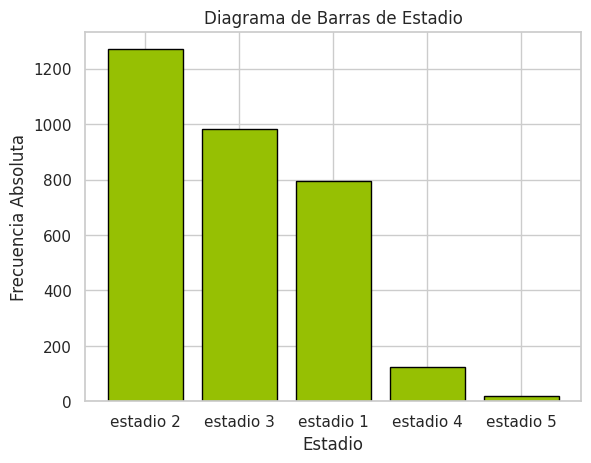

In [ ]:
from matplotlib import pyplot as plt


etapa = df4['estadio']

plt.bar(etapa.value_counts().index, height=etapa.value_counts(), color="#96C003", edgecolor='black')

# Etiquetas de los ejes y título
plt.xlabel('Estadio')
plt.ylabel('Frecuencia Absoluta')
plt.title('Diagrama de Barras de Estadio')

# Mostrar el diagrama
plt.show()


Text(44.78812500000001, 0.5, 'Creatinina en sangre (mg/dl)')

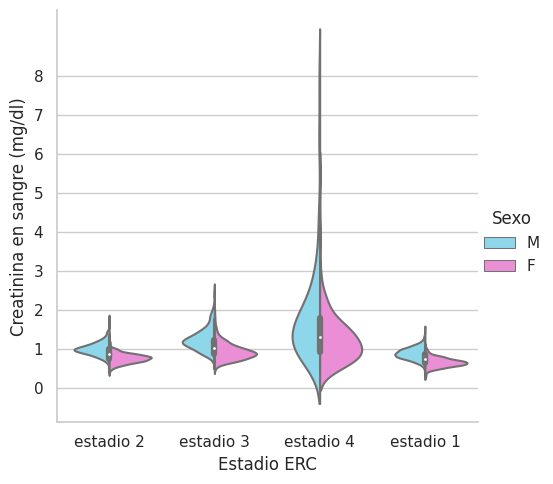

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
colores = {"M":"#7FDEF9", "F":"#F97FDE"}
dispersion = sns.catplot(data=df4, kind="violin", x="estadio", y="CREA ", hue="Sexo", split=True, palette=colores)
dispersion._legend.set_title('Sexo')

plt.yticks(range(0,9,1))
plt.xlabel('Estadio ERC')
plt.ylabel('Creatinina en sangre (mg/dl)')



Text(0.5, 1.0, 'Gráfico de dispersion IMC Vs TFGe')

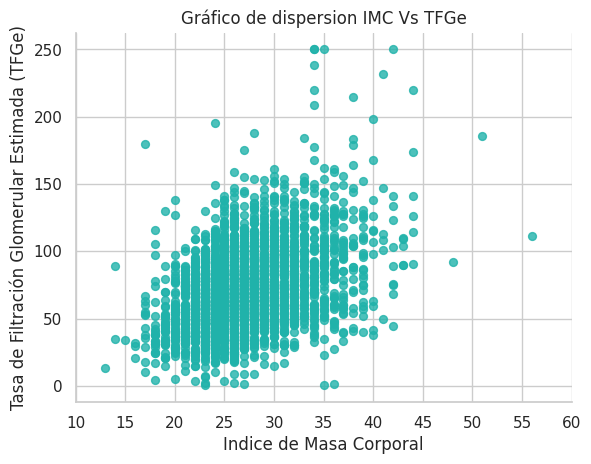

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

df4.plot(kind='scatter', x='IMC', y='TASA FILTRACION', s=32, alpha=.8, c="lightseagreen")
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xticks(range(10,61,5))

#plt.yticks(np.arange(0, 8.5, 0.5))

plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Tasa de Filtración Glomerular Estimada (TFGe)')
plt.title('Gráfico de dispersion IMC Vs TFGe')


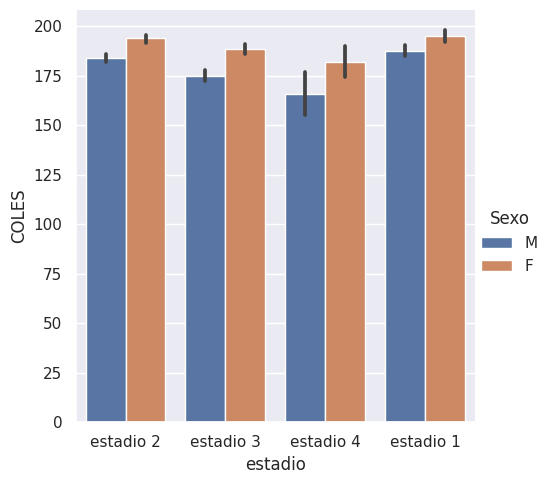

In [ ]:
sns.catplot(data=df2, kind="bar", x="estadio", y="COLES", hue="Sexo")

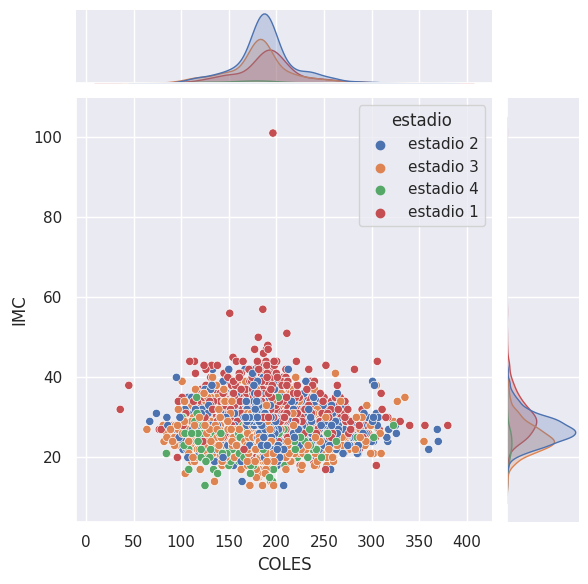

In [ ]:
sns.jointplot(data=df2, x="COLES", y="IMC", hue="estadio")

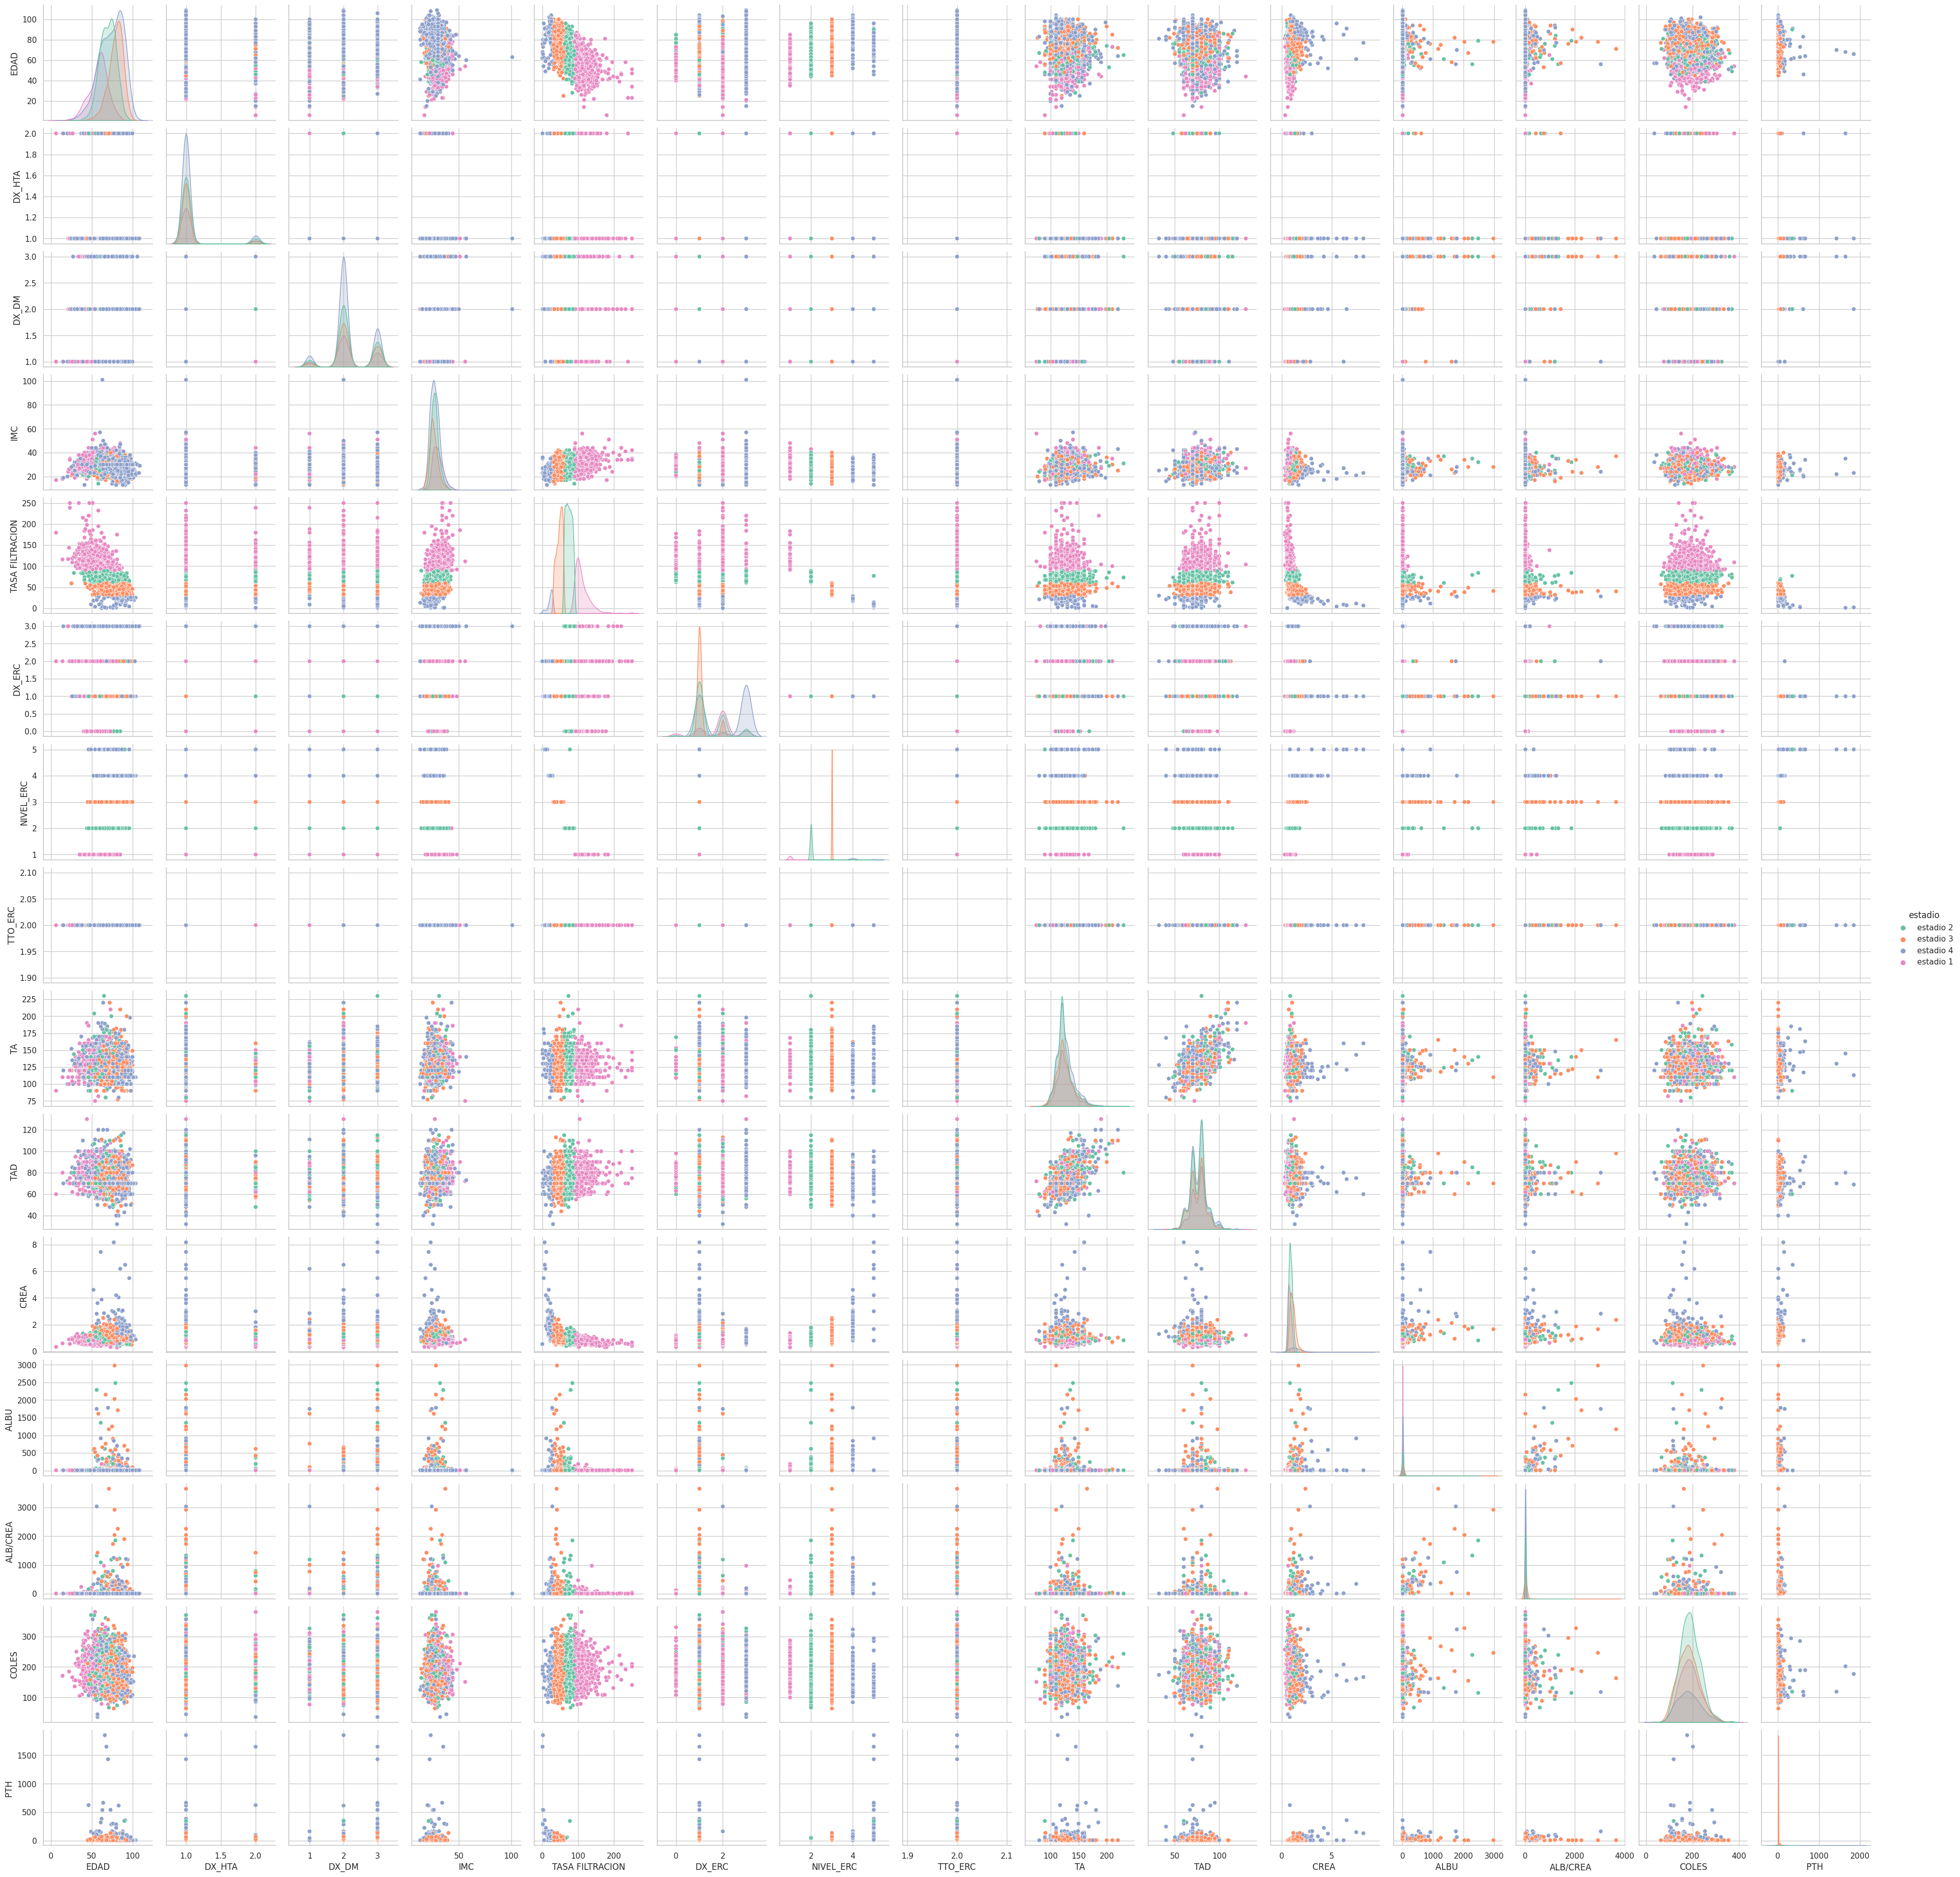

In [ ]:
sns.pairplot(data=df4, hue="estadio", palette="Set2")

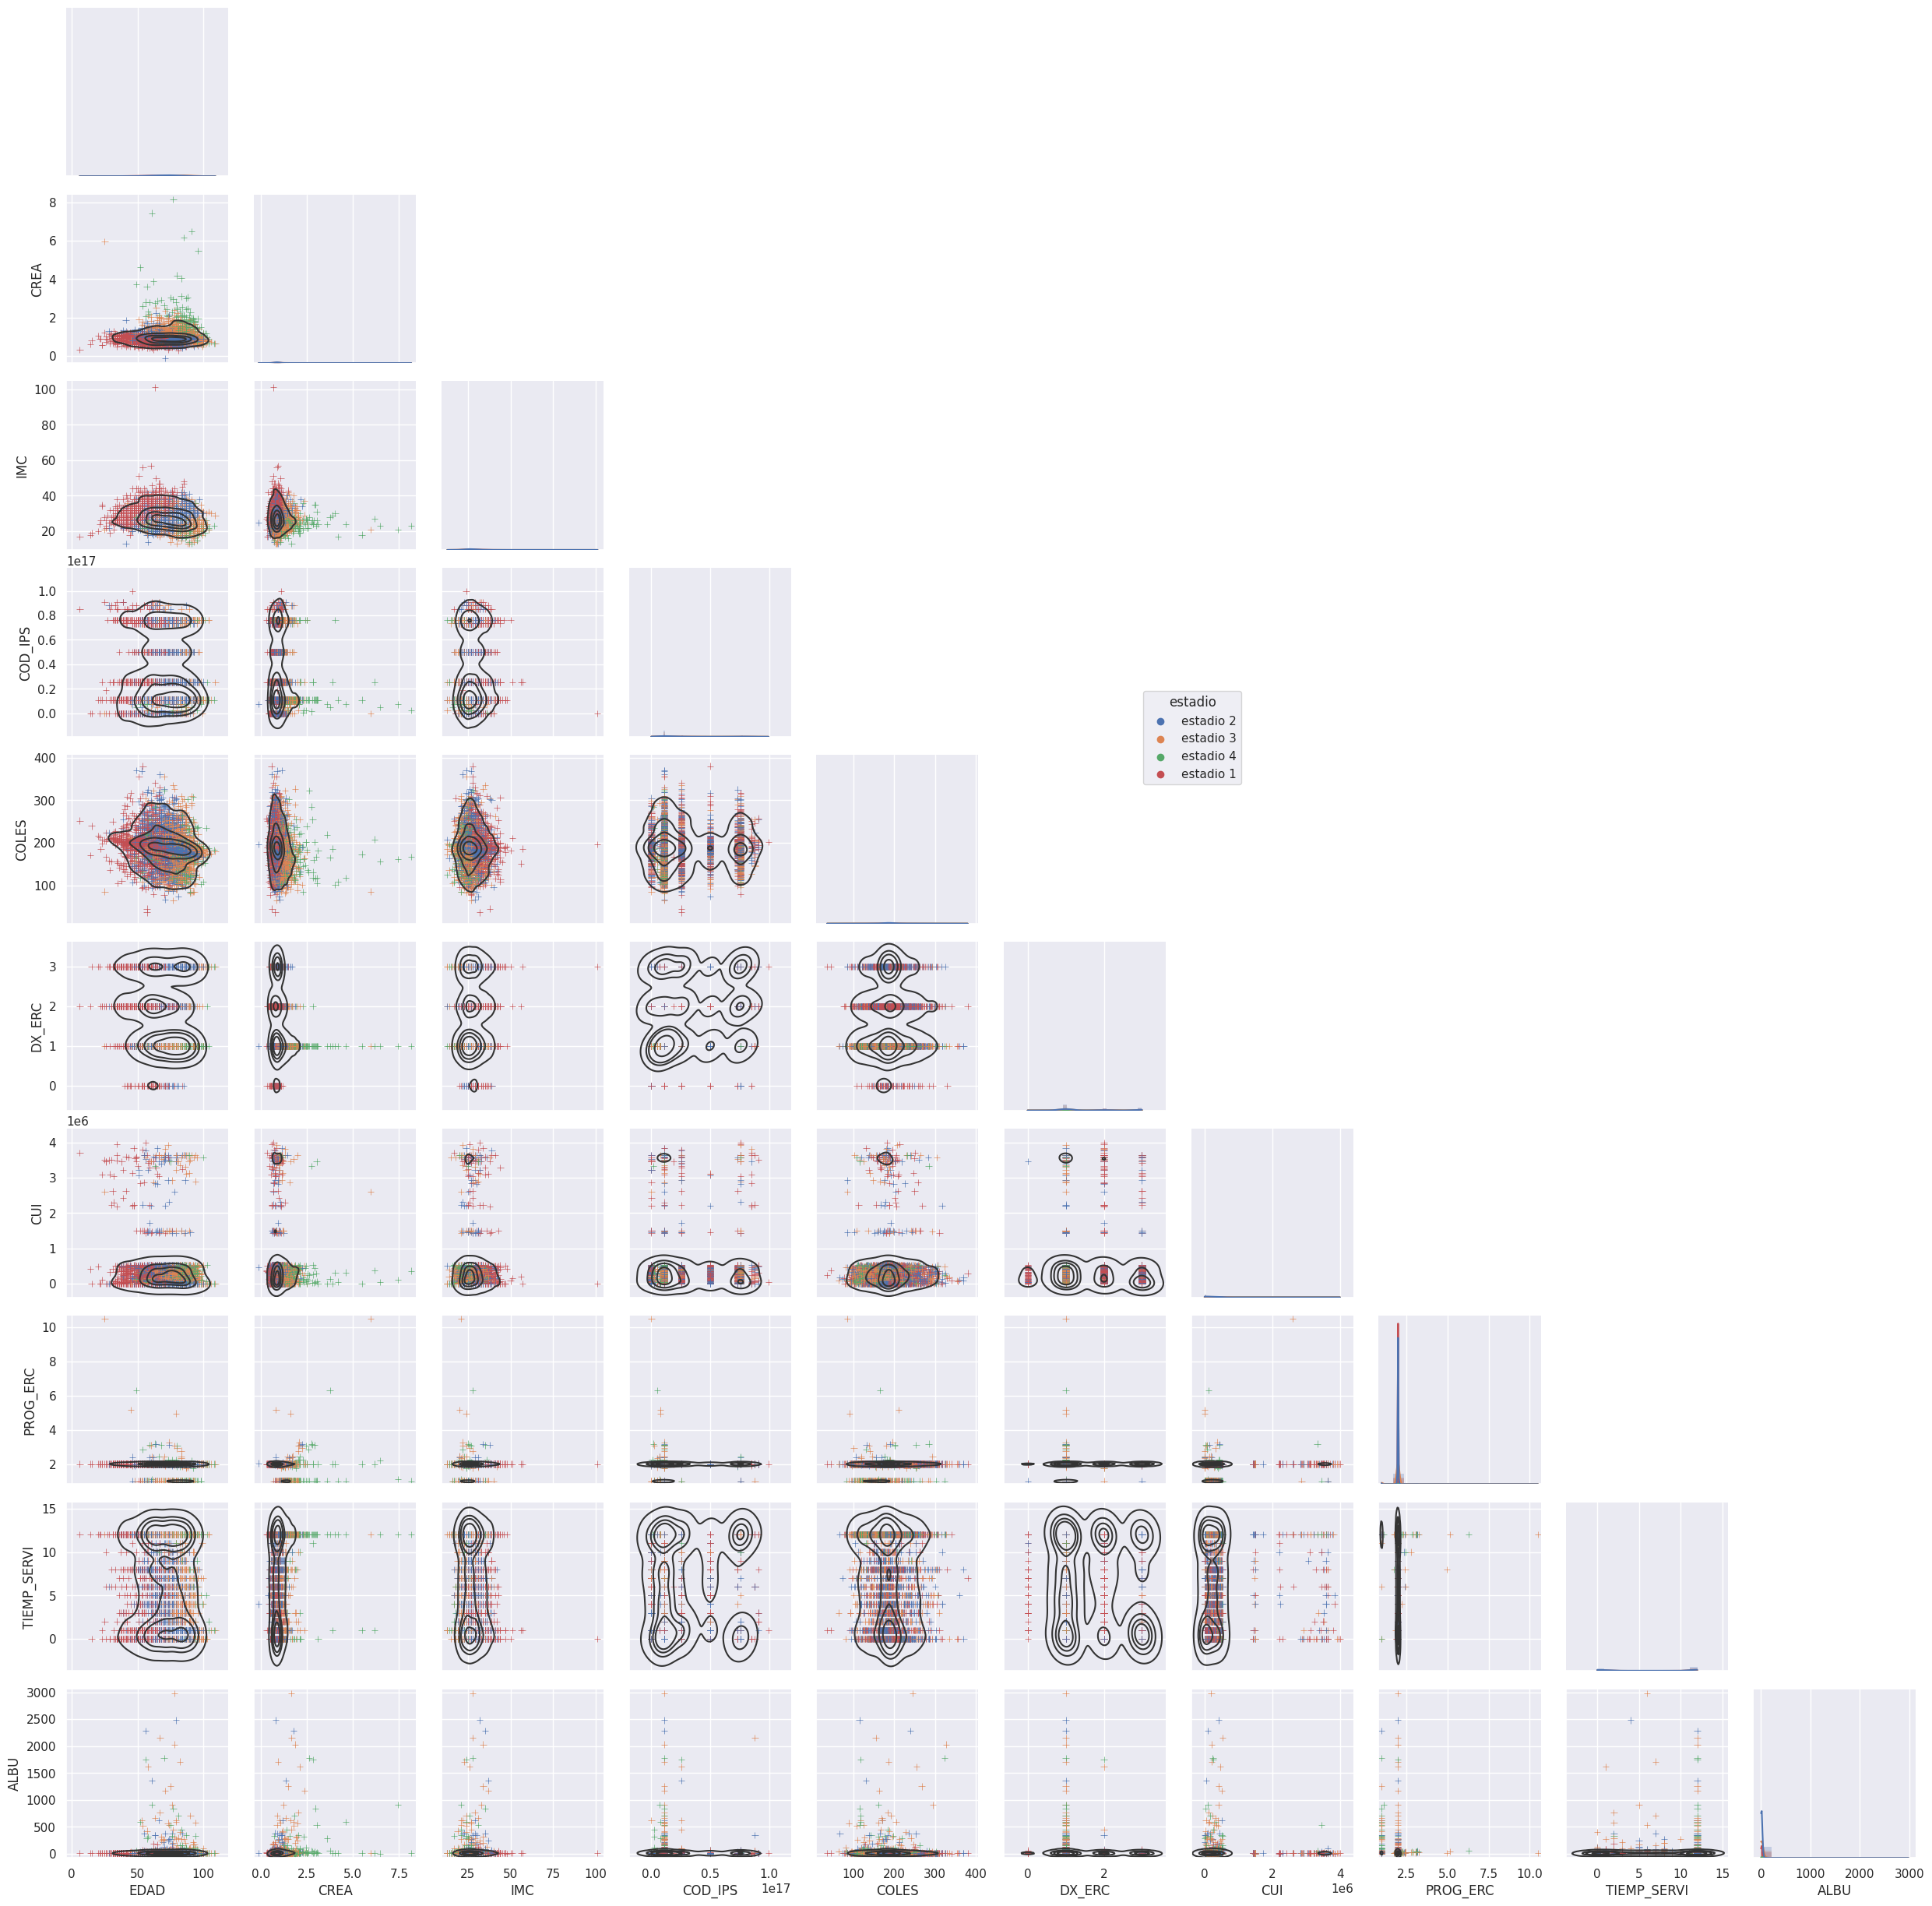

In [ ]:
g = sns.PairGrid(df2, hue="estadio", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

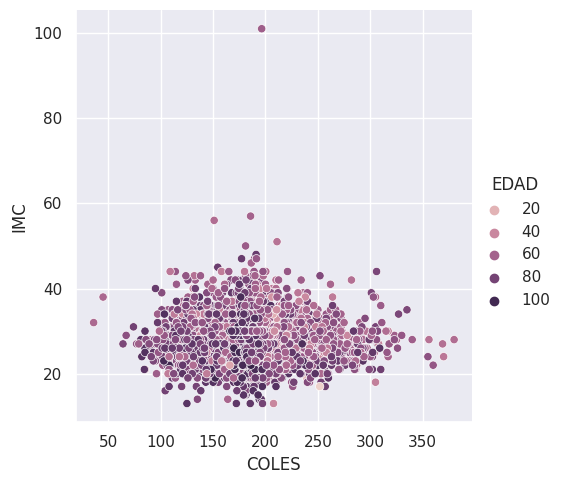

In [ ]:
sns.relplot(
    data=df2,
    x="COLES", y="IMC", hue="EDAD"
)